In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# **1.Import the data and inspect the top 5 rows**

In [62]:
#import the car sales dataset
car_price_pred=pd.read_csv('/content/drive/MyDrive/Python Projects/Car Price Prediction/car_prediction_data.csv')
car_price_pred.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **2. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [63]:
#Find Shape of Our Dataset (Number of Rows And Number of Columns)
car_price_pred.shape

(301, 9)

In [64]:
print("Number of Rows",car_price_pred.shape[0])
print("Number of Columns",car_price_pred.shape[1])

Number of Rows 301
Number of Columns 9


# **3. Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [65]:
#informayion on the dataset
car_price_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# **4. Check Null Values In The Dataset**

In [66]:
#checking for null
car_price_pred.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0



# 5.Overall Statistics About The Dataset **bold text**

In [67]:
#Get Overall Statistics About The Dataset
car_price_pred.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **6. Data Processing**

In [68]:
#data Preprocessing
car_price_pred.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [69]:
#adding another column to describe age of the car
import datetime

In [70]:
date_time=datetime.datetime.now()

In [71]:
#age of the car
car_price_pred['Age']=date_time.year-car_price_pred['Year']

In [72]:
car_price_pred.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [73]:
#dropping the year column now that we have the age column
car_price_pred.drop('Year',axis=1,inplace=True)

# **7. Outlier Removal**

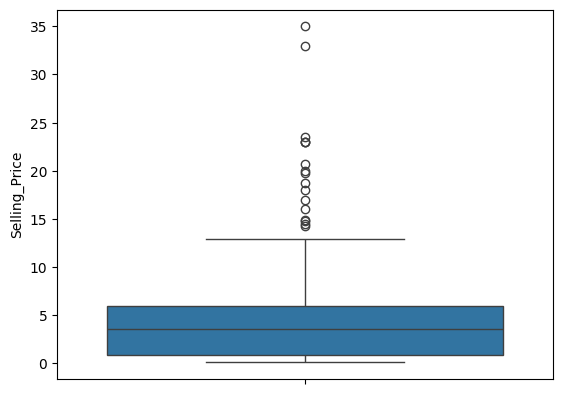

In [74]:
#checking for outliers
import seaborn as sns
sns.boxplot(car_price_pred['Selling_Price']);

In [75]:
#selecting the outliers

sorted(car_price_pred['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [76]:
#selecting the rows with selling price between 33 & 35
car_price_pred[car_price_pred['Selling_Price'].between(33,35)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [77]:
#extracting the other data whose price is not between 33 & 35
car_price_pred=car_price_pred[~car_price_pred['Selling_Price'].between(33,35)]
car_price_pred.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [78]:
car_price_pred.shape


(299, 9)

# **8. Encoding the Categorical Columns**

In [79]:
#Encoding the Categorical Columns
car_price_pred.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [80]:
#encoding will be done on Fuel_Type	,Seller_Type and	Transmission
car_price_pred['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [81]:
#mapping 0,1,2 to the unique types i fuel type
car_price_pred['Fuel_Type']=car_price_pred['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [82]:
car_price_pred['Fuel_Type'].unique()

array([0, 1, 2])

In [83]:
#checking the Seller_Type unique values
car_price_pred['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [84]:
#encoding the Seller_Type column
car_price_pred['Seller_Type']=car_price_pred['Seller_Type'].map({'Dealer':0,'Individual':1})

In [85]:
#checking the Transmission unique values
car_price_pred['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [86]:
#encoding the Transmission column
car_price_pred['Transmission']=car_price_pred['Transmission'].map({'Manual':0,'Automatic':1})

In [87]:
car_price_pred.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10



# 9. **Store Feature Matrix In X and Response(Target) In Vector y**

In [90]:
#Store Feature Matrix In X and Response(Target) In Vector y
X=car_price_pred.drop(['Car_Name','Selling_Price'],axis=1)
y=car_price_pred['Selling_Price']

# **10. Splitting The Dataset Into The Training Set And Test Set**

In [91]:
#Splitting The Dataset Into The Training Set And Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **11. Import The Models**
The models we import are depended of on the datatype of the target variable. In our  ase the selling price is continous hence we will import regression models

In [93]:
#importing the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# **12. Model Training**

In [95]:
#model training
lnreg=LinearRegression()
lnreg.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **13. Prediction on Test Data**

In [96]:
#Prediction on Test Data
y_pred1=lnreg.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=gb.predict(X_test)
y_pred4=xgb.predict(X_test)

# **14. Evaluating the Perfomamnce of the Algorithms**
I will use r^2 score.
R^2 is an important metric to evaluate perfomance of a regresssion based machine learning model

In [98]:
# Evaluating the Algorithm using r^2 score.
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred1)
score2=r2_score(y_test,y_pred2)
score3=r2_score(y_test,y_pred3)
score4=r2_score(y_test,y_pred4)

In [99]:
#printinf the score
print(score1,score2,score3,score4)

0.6790884983129405 0.7173673262014573 0.8682824504744376 0.8887471822279068


In [102]:
#saving the scores to a DataFrame
model_scores=pd.DataFrame({'Models':['LR','RF','GBR','XG'],
              'R2_Score':[score1,score2,score3,score4]
              })
model_scores

,Models,R2_Score
0,LR,0.679088
1,RF,0.717367
2,GBR,0.868282
3,XG,0.888747


<Axes: xlabel='Models', ylabel='R2_Score'>

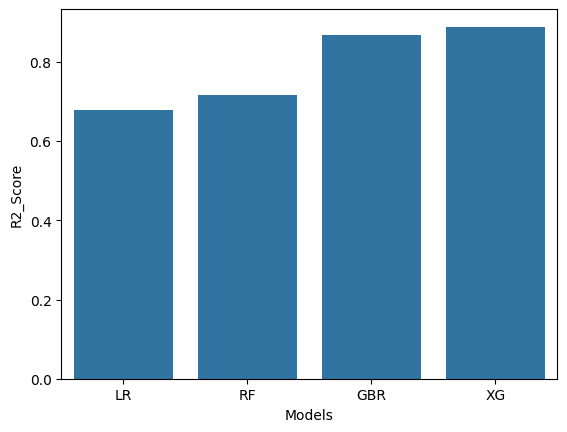

In [104]:
#plot the model scores
sns.barplot(x='Models',y='R2_Score',data=model_scores)

# **Findings:XBRegressor is the best model for this dataset it has a R2 score of 88%**

# **15. Saving the best model and and train the best model on the entire dataset in production.**

In [106]:
#training the best model on the entire dataset
xg=XGBRegressor()
xg_best_model=xg.fit(X,y)

In [107]:
#saving the model
import joblib
joblib.dump(xg_best_model,'Car_Price_Prediction_Model')

['Car_Price_Prediction_Model']

In [109]:
#load the model
price_predictor=joblib.load('Car_Price_Prediction_Model')

# **16. Prediction on New Data**

In [111]:
#creating new data to predict
import pandas as pd
test_data = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [113]:
#predicting using the best model on the test data
price_predictor.predict(test_data)

array([3.4819746], dtype=float32)